/user/ml4723/.conda/envs/neural_inventory_control/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/user/ml4723/.conda/envs/neural_inventory_control/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Filtered to 21 stores
Total selected stores: 21

Setting with 1 warehouse(s):

Edges matrix:
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

Lead times matrix:
[[3. 3. 3. 3. 2. 3. 3. 3. 2. 3. 3. 4. 3. 3. 3. 3. 3. 3. 3. 2. 3.]]
 Warehouse 0: #Stores = 21, Connected stores = 21

Setting with 2 warehouse(s):

Edges matrix:
[[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]]

Lead times matrix:
[[3. 4. 3. 4. 3. 3. 2. 2. 2. 2. 2. 3. 2. 2. 3. 3. 3. 3. 3. 3. 2.]
 [2. 2. 2. 2. 2. 4. 3. 3. 3. 3. 3. 4. 3. 4. 2. 2. 2. 2. 2. 2. 3.]]
 Warehouse 0: #Stores = 10, Connected stores = 20
 Warehouse 1: #Stores = 11, Connected stores = 16

Setting with 3 warehouse(s):

Edges matrix:
[[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

Lead times matrix:
[[4. 4. 

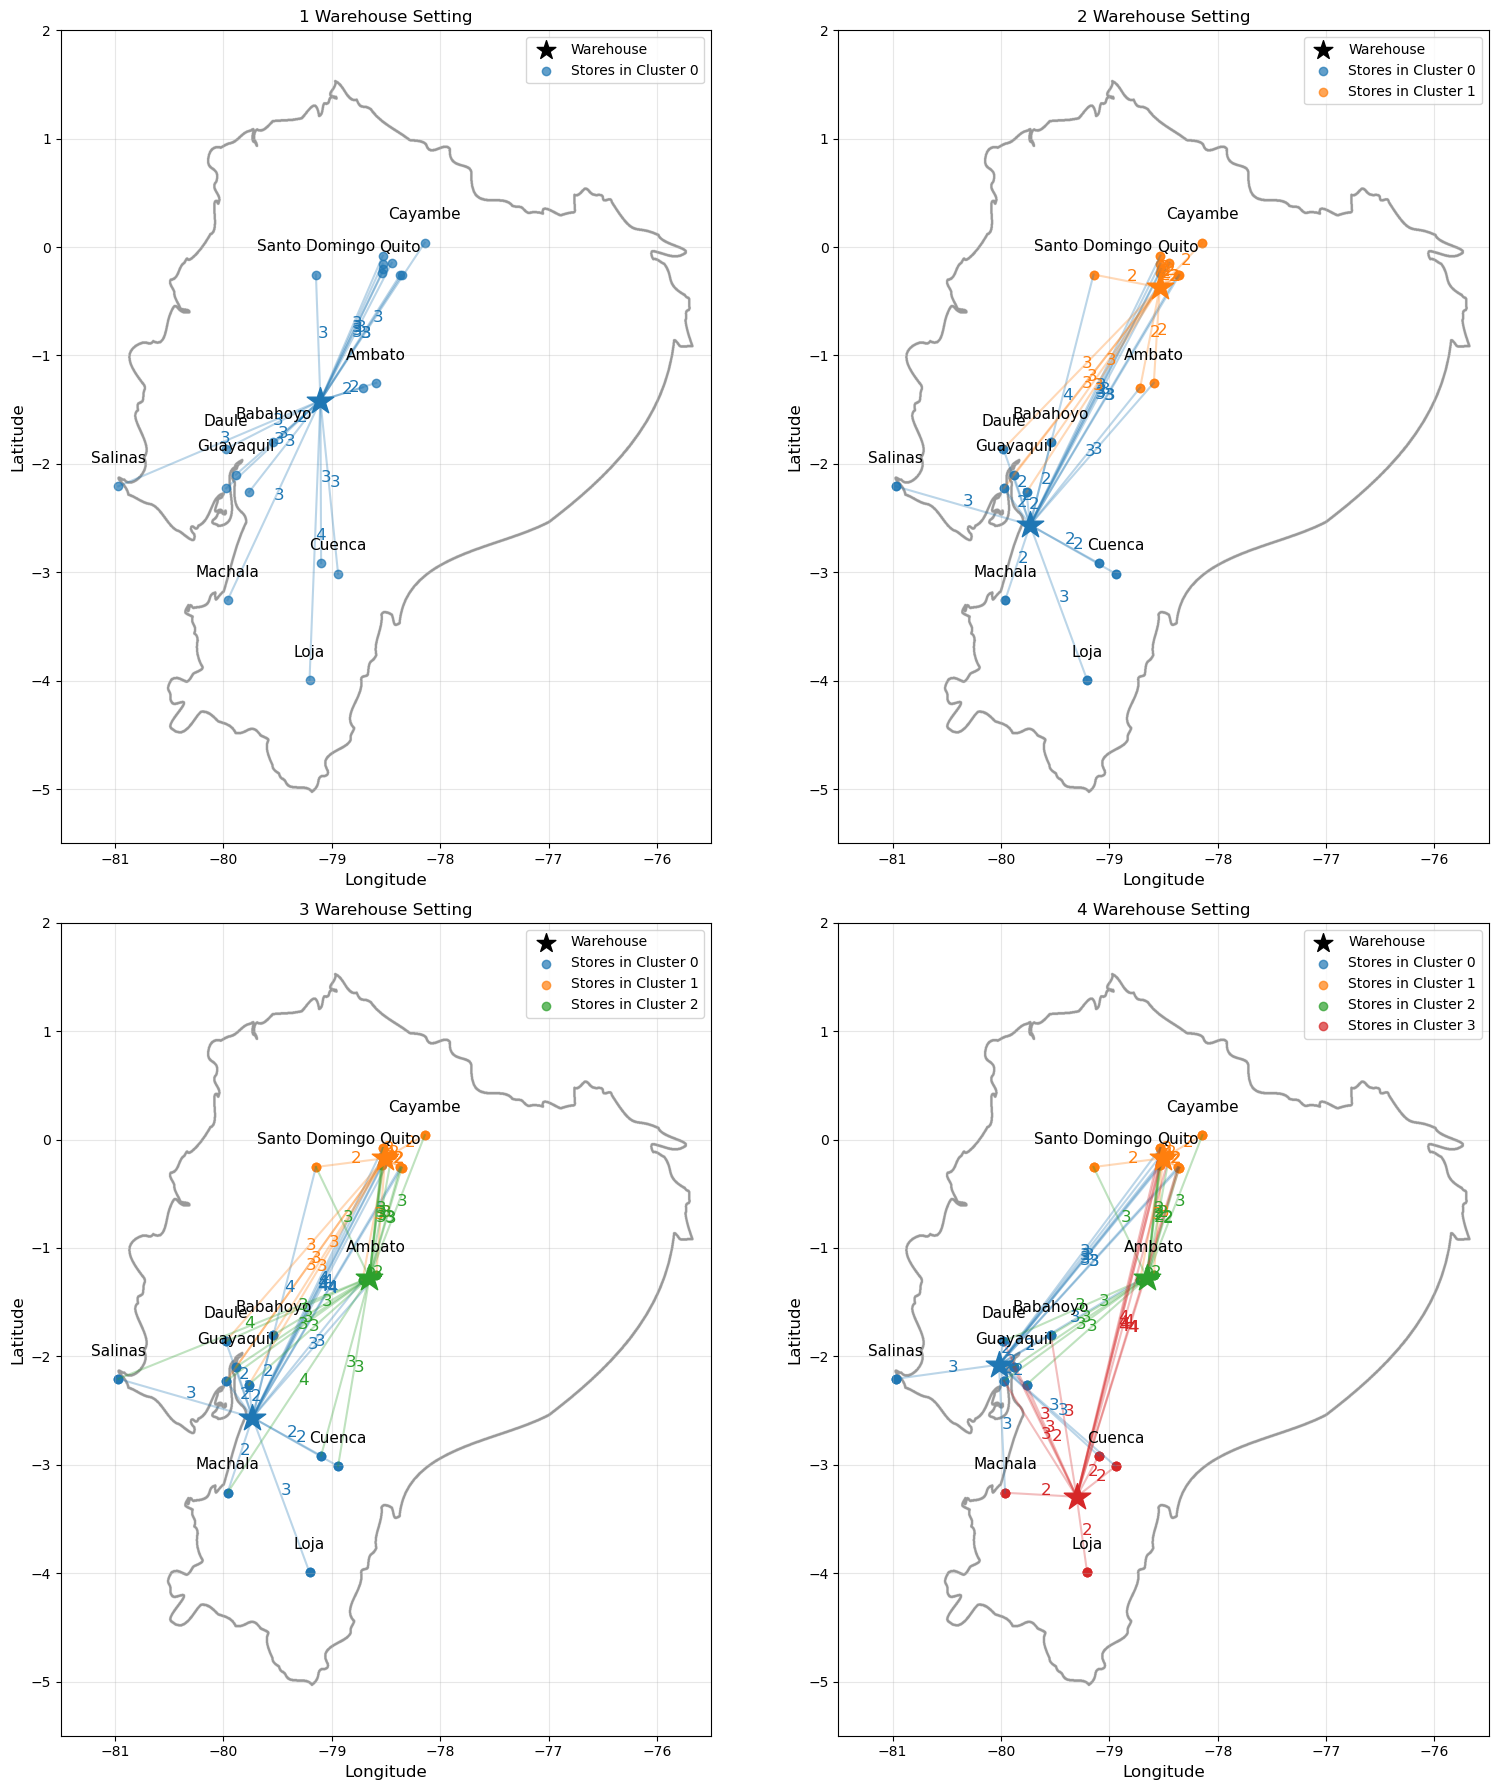

In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.image as mpimg

# -----------------------------
# 1. Define store data and selection
# -----------------------------

# Create a DataFrame for the 54 stores
data = [
    [1, "Quito", "Pichincha", "D", 13],
    [2, "Quito", "Pichincha", "D", 13],
    [3, "Quito", "Pichincha", "D", 8],
    [4, "Quito", "Pichincha", "D", 9],
    [5, "Santo Domingo", "Santo Domingo de los Tsachilas", "D", 4],
    [6, "Quito", "Pichincha", "D", 13],
    [7, "Quito", "Pichincha", "D", 8],
    [8, "Quito", "Pichincha", "D", 8],
    [9, "Quito", "Pichincha", "B", 6],
    [10, "Quito", "Pichincha", "C", 15],
    [11, "Cayambe", "Pichincha", "B", 6],
    [12, "Latacunga", "Cotopaxi", "C", 15],
    [13, "Latacunga", "Cotopaxi", "C", 15],
    [14, "Riobamba", "Chimborazo", "C", 7],
    [15, "Ibarra", "Imbabura", "C", 15],
    [16, "Santo Domingo", "Santo Domingo de los Tsachilas", "C", 3],
    [17, "Quito", "Pichincha", "C", 12],
    [18, "Quito", "Pichincha", "B", 16],
    [19, "Guaranda", "Bolivar", "C", 15],
    [20, "Quito", "Pichincha", "B", 6],
    [21, "Santo Domingo", "Santo Domingo de los Tsachilas", "B", 6],
    [22, "Puyo", "Pastaza", "C", 7],
    [23, "Ambato", "Tungurahua", "D", 9],
    [24, "Guayaquil", "Guayas", "D", 1],
    [25, "Salinas", "Santa Elena", "D", 1],
    [26, "Guayaquil", "Guayas", "D", 10],
    [27, "Daule", "Guayas", "D", 1],
    [28, "Guayaquil", "Guayas", "E", 10],
    [29, "Guayaquil", "Guayas", "E", 10],
    [30, "Guayaquil", "Guayas", "C", 3],
    [31, "Babahoyo", "Los Rios", "B", 10],
    [32, "Guayaquil", "Guayas", "C", 3],
    [33, "Quevedo", "Los Rios", "C", 3],
    [34, "Guayaquil", "Guayas", "B", 6],
    [35, "Playas", "Guayas", "C", 3],
    [36, "Libertad", "Guayas", "E", 10],
    [37, "Cuenca", "Azuay", "D", 2],
    [38, "Loja", "Loja", "D", 4],
    [39, "Cuenca", "Azuay", "B", 6],
    [40, "Machala", "El Oro", "C", 3],
    [41, "Machala", "El Oro", "D", 4],
    [42, "Cuenca", "Azuay", "D", 2],
    [43, "Esmeraldas", "Esmeraldas", "E", 10],
    [44, "Quito", "Pichincha", "A", 5],
    [45, "Quito", "Pichincha", "A", 11],
    [46, "Quito", "Pichincha", "A", 14],
    [47, "Quito", "Pichincha", "A", 14],
    [48, "Quito", "Pichincha", "A", 14],
    [49, "Quito", "Pichincha", "A", 11],
    [50, "Ambato", "Tungurahua", "A", 14],
    [51, "Guayaquil", "Guayas", "A", 17],
    [52, "Manta", "Manabi", "A", 11],
    [53, "Manta", "Manabi", "D", 13],
    [54, "El Carmen", "Manabi", "C", 3]
]
columns = ["store_nbr", "city", "state", "type", "cluster"]
stores_df = pd.DataFrame(data, columns=columns)

max_distance_multipliers = [1.7, 1.7, 1.7, 1.7]
max_overall_clusters = True
connect_to_quitos = True

# Filter stores_df to keep only the specified store numbers
stores_to_keep = [3, 5, 8, 11, 23, 25, 27, 28, 31, 34, 37, 38, 39, 41, 44, 45, 47, 48, 49, 50, 51]
stores_df = stores_df[stores_df['store_nbr'].isin(stores_to_keep)].reset_index(drop=True)
print(f"Filtered to {len(stores_df)} stores")

# Group stores by city
city_groups = stores_df.groupby("city")
# Find cities with >1 store (multi-store) and with exactly 1 store (single-store)
multi_store_cities = [city for city, group in city_groups if len(group) > 1]
single_store_cities = [city for city, group in city_groups if len(group) == 1]

# Use all stores since data already has 46 stores
selected_stores = stores_df.reset_index(drop=True)
print("Total selected stores:", len(selected_stores))


# -----------------------------
# 2. Assign random coordinates based on city centers
# -----------------------------
# Original dictionary: keys are city names, values are (lon, lat) tuples
city_coords = {
    "Esmeraldas": (-79.6545, 0.9682),
    "Ibarra": (-78.1165, 0.3517),
    "Cayambe": (-78.1416, 0.0412),
    "Quito": (-78.4678, -0.1807),
    "Santo Domingo": (-79.1459, -0.253),
    "Manta": (-80.7214, -0.9682),
    "Latacunga": (-78.6131, -0.9352),
    "El Carmen": (-79.8413, -0.3944),
    "Quevedo": (-79.4632, -1.0281),
    "Puyo": (-78.0035, -1.4921),
    "Ambato": (-78.6197, -1.2491),
    "Riobamba": (-78.6546, -1.6636),
    "Babahoyo": (-79.5400, -1.8022),
    "Daule": (-79.9775, -1.8619),
    "Guayaquil": (-79.8891, -2.1709),
    "Libertad": (-80.9182, -2.2333),
    "Playas": (-80.3895, -2.6333),
    "Salinas": (-80.9693, -2.2072),
    "Cuenca": (-79.0059, -2.9006),
    "Machala": (-79.9616, -3.2581),
    "Loja": (-79.2050, -3.9931),
    "Guaranda": (-79.0000, -1.5900),
}


def latlon_to_mercator(lon, lat):
    """
    Convert longitude and latitude (in degrees) to x, y coordinates 
    in the Web Mercator projection (in meters).
    """
    R = 6378137  # Earth's radius in meters for Web Mercator
    x = R * math.radians(lon)
    y = R * math.log(math.tan(math.pi/4 + math.radians(lat)/2))
    return x, y

# Convert the dictionary of city centers to Web Mercator (x, y) coordinates
mercator_coords = {city: latlon_to_mercator(lon, lat) for city, (lon, lat) in city_coords.items()}
# Mirror coordinates by y=x axis by swapping x and y coordinates
mercator_coords = {city: (y, x) for city, (x, y) in mercator_coords.items()}

city_coords = mercator_coords


rng = np.random.RandomState(5)  # Fixed seed for reproducibility
# Function to add random noise (simulate dispersion within a city's area)
def random_location(city, noise=15000):  # noise in meters for mercator coords
    if city in city_coords:
        base_x, base_y = city_coords[city]
        # Only add noise if city has multiple stores
        if city in multi_store_cities:
            # add uniform noise in x and y coordinates with fixed seed
            x = base_x + rng.uniform(-noise, noise)
            y = base_y + rng.uniform(-noise, noise)
        else:
            # Use exact city coordinates for single-store cities
            x, y = base_x, base_y
        return x, y
    else:
        # if city not in lookup, return NaN
        return np.nan, np.nan

# Assign random lat, lon for each selected store
lats, lons = [], []
for idx, row in selected_stores.iterrows():
    lat, lon = random_location(row["city"])
    lats.append(lat)
    lons.append(lon)
selected_stores["lat"] = lats
selected_stores["lon"] = lons

# -----------------------------
# 3. Define haversine distance function
# -----------------------------
def haversine(x1, y1, x2, y2):
    # Since coordinates are already in Web Mercator projection (meters)
    # We can use Euclidean distance and convert to kilometers
    dx = x2 - x1
    dy = y2 - y1
    distance_meters = math.sqrt(dx**2 + dy**2)
    return distance_meters / 1000  # Convert to kilometers

# -----------------------------
# 4. Clustering, cost and lead time computations and plotting
# -----------------------------

# Primitive parameters
h0, h1 = 0.2, 0.4  # warehouse holding cost range
dl0, dl1 = 2, 4    # distance lead time range

# Create a figure with 4 subplots for 1, 2, 3, and 4 warehouses
fig, axes = plt.subplots(2, 2, figsize=(16, 18))
axes = axes.flatten()

# We'll work on the numpy array of store coordinates
coords = selected_stores[["lat", "lon"]].values


def mercator_to_latlon(x, y):
    """
    Convert x, y coordinates in the Web Mercator projection (in meters)
    back to longitude and latitude (in degrees).
    """
    R = 6378137  # Earth's radius in meters for Web Mercator
    lon = math.degrees(x / R)
    lat = math.degrees(2 * math.atan(math.exp(y / R)) - math.pi/2)
    return lon, lat

# For each setting (number of warehouses = k)
for i, k in enumerate([1, 2, 3, 4]):
    ax = axes[i]
    img = mpimg.imread('/user/ml4723/Prj/NIC/Input/favorita-grocery-sales-forecasting/Outline_Simple_Map_of_Ecuador.eps')
    ax.imshow(img, extent=[-82.15, -74.5, -6, 2.5], alpha=0.4)
    max_distance_multiplier = max_distance_multipliers[i]
    # Run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(coords)
    centers = kmeans.cluster_centers_
    
    # Append cluster labels to DataFrame copy
    stores_clustered = selected_stores.copy()
    stores_clustered["cluster"] = labels
    
    # Determine number of stores per cluster
    cluster_counts = stores_clustered.groupby("cluster").size()
    min_count = cluster_counts.min()
    max_count = cluster_counts.max()
    
    # For printing warehouse info
    warehouse_info = []
    
    # Calculate max distances for each cluster
    max_distances = []
    for cluster in range(k):
        cluster_stores = stores_clustered[stores_clustered["cluster"] == cluster]
        center_lat, center_lon = centers[cluster]
        # Calculate distances from center to all points in cluster
        distances = [haversine(center_lat, center_lon, store["lat"], store["lon"]) 
                    for _, store in cluster_stores.iterrows()]
        # Get the maximum distance
        max_dist = max(distances) if distances else 0
        max_distances.append(max_dist)
    
    # Initialize edges and lead times matrices
    edges = np.zeros((k, len(stores_clustered)))
    lead_times = np.zeros((k, len(stores_clustered)))
    
    # For each warehouse (cluster)
    for cluster in range(k):
        cluster_stores = stores_clustered[stores_clustered["cluster"] == cluster]
        w_n = len(cluster_stores)
        # Compute normalized weight: if max_count==min_count then weight=1
        if max_count != min_count:
            w_k = (w_n - min_count) / (max_count - min_count)
        else:
            w_k = 1.0
        
        # Compute distances of each store in cluster from warehouse center
        center_lat, center_lon = centers[cluster]
        distances = []
        for idx, store in stores_clustered.iterrows():
            d = haversine(center_lat, center_lon, store["lat"], store["lon"])
            distances.append(d)
            
            # Check if store is within max distance * multiplier
            if max_overall_clusters:
                max_d = max(max_distances)
            else:
                max_d = max_distances[cluster]
            if d <= max_d * max_distance_multiplier:
                edges[cluster][idx] = 1
                
        # Determine min and max distance in this cluster (for normalization)
        if distances:
            min_d = min(distances)
            max_d = max(distances)
        else:
            min_d, max_d = 0, 0
        
        # For each distance, compute lead time based only on distance
        for idx, d in enumerate(distances):
            if max_d != min_d:
                norm_d = (d - min_d) / (max_d - min_d)
            else:
                norm_d = 0
                
            lead_time = dl0 + (dl1 - dl0) * norm_d
            lead_times[cluster][idx] = np.round(lead_time)
        
        warehouse_info.append({
            "warehouse": cluster,
            "stores": w_n,
            "w_k": w_k
        })

    # Connect all warehouses to Quito stores
    for idx, store in stores_clustered.iterrows():
        if store["city"] == "Quito":
            # Connect to all warehouses
            for w in range(k):
                edges[w][idx] = 1
                # Calculate lead time based on distance
                d = haversine(centers[w][0], centers[w][1], store["lat"], store["lon"])
                if max_d != min_d:
                    norm_d = (d - min_d) / (max_d - min_d)
                else:
                    norm_d = 0
                lead_time = dl0 + (dl1 - dl0) * norm_d
                lead_times[w][idx] = np.round(lead_time)
    
    # Plotting: scatter plot for store locations colored by cluster, and mark warehouse centers.
    # First plot warehouse marker in legend
    ax.scatter([], [], c='black', marker='*', s=200, label='Warehouse')
    # Define colors for clusters - using a simpler color palette
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
              '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']
    
    # Plot connections and stores for each cluster
    connected_stores_count = [0] * k  # Initialize counter for each cluster
    
    for cluster in range(k):
        cluster_data = stores_clustered[stores_clustered["cluster"] == cluster]
        color = colors[cluster % len(colors)]  # Get color for this cluster
        center_lat, center_lon = centers[cluster]
        # Convert center coordinates to lat/lon
        center_lon, center_lat = mercator_to_latlon(center_lon, center_lat)
        max_dist = max(max_distances)
        
        for _, store in stores_clustered.iterrows():
            # Convert store coordinates to lat/lon
            store_lon, store_lat = mercator_to_latlon(store["lon"], store["lat"])
            dist = haversine(center_lat, center_lon, store_lat, store_lon)
            # Plot store
            store_color = colors[store["cluster"] % len(colors)]
            ax.scatter(store_lon, store_lat, 
                      color=store_color, alpha=0.7)
            
            # Draw connection line if edge exists
            if edges[cluster][store.name]:
                ax.plot([center_lon, store_lon], 
                       [center_lat, store_lat], 
                       color=color, alpha=0.3, linestyle='-')
                # Add lead time label at midpoint of edge
                mid_lon = (center_lon + store_lon) / 2
                mid_lat = (center_lat + store_lat) / 2
                lead_time = int(lead_times[cluster][store.name])
                ax.annotate(str(lead_time), 
                           (mid_lon, mid_lat),
                           fontsize=12,
                           color=color,
                           alpha=1.0)
                connected_stores_count[cluster] += 1
                
        # Plot warehouse center
        ax.scatter(center_lon, center_lat, c=color, marker="*", s=400, zorder=10)
        
        # Add cluster label to legend
        ax.scatter([], [], c=color, label=f"Stores in Cluster {cluster}", alpha=0.7)
        
        # Track cities already labeled in this cluster
        labeled_cities = set()
        # Add city names for each point
        for _, store in cluster_data.iterrows():
            store_lon, store_lat = mercator_to_latlon(store["lon"], store["lat"])
            if store["city"] not in labeled_cities:
                ax.annotate(store["city"], (store_lon, store_lat), 
                           fontsize=11, alpha=1.0,
                            ha='center',
                            va='center',
                           xytext=(0, 20), textcoords='offset points')
                labeled_cities.add(store["city"])
            
    ax.set_title(f"{k} Warehouse Setting")
    ax.legend()
    ax.set_xlabel("Longitude", fontsize=12)
    ax.set_ylabel("Latitude", fontsize=12)
    ax.set_xlim([-81.5, -75.5])
    ax.set_ylim([-5.5, 2.0])
    ax.tick_params(labelsize=10)
    ax.grid(True, alpha=0.3)

    print(f"\nSetting with {k} warehouse(s):")
    print("\nEdges matrix:")
    print(edges)
    print("\nLead times matrix:")
    print(lead_times)
    for info, connected_count in zip(warehouse_info, connected_stores_count):
        print(f" Warehouse {info['warehouse']}: #Stores = {info['stores']}, "
                f"Connected stores = {connected_count}")

plt.tight_layout()
plt.show()


/user/ml4723/.conda/envs/neural_inventory_control/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/user/ml4723/.conda/envs/neural_inventory_control/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Filtered to 21 stores
Total selected stores: 21

Setting with 2 warehouse(s):

Edges matrix:
[[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]]

Lead times matrix:
[[6. 6. 6. 6. 6. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 5. 5.]
 [1. 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2.]]
 Warehouse 0: #Stores = 10, Connected stores = 20, Holding cost = 0.3
 Warehouse 1: #Stores = 11, Connected stores = 18, Holding cost = 0.4

Setting with 3 warehouse(s):

Edges matrix:
[[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

Lead times matrix:
[[6. 6. 6. 6. 6. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 5. 5.]
 [1. 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2.]
 [5. 5. 5. 5. 4. 6. 5. 5. 5. 5. 5. 6. 5. 6. 5. 5. 5. 5. 5. 4. 5.]]
 Warehouse 0: #Sto

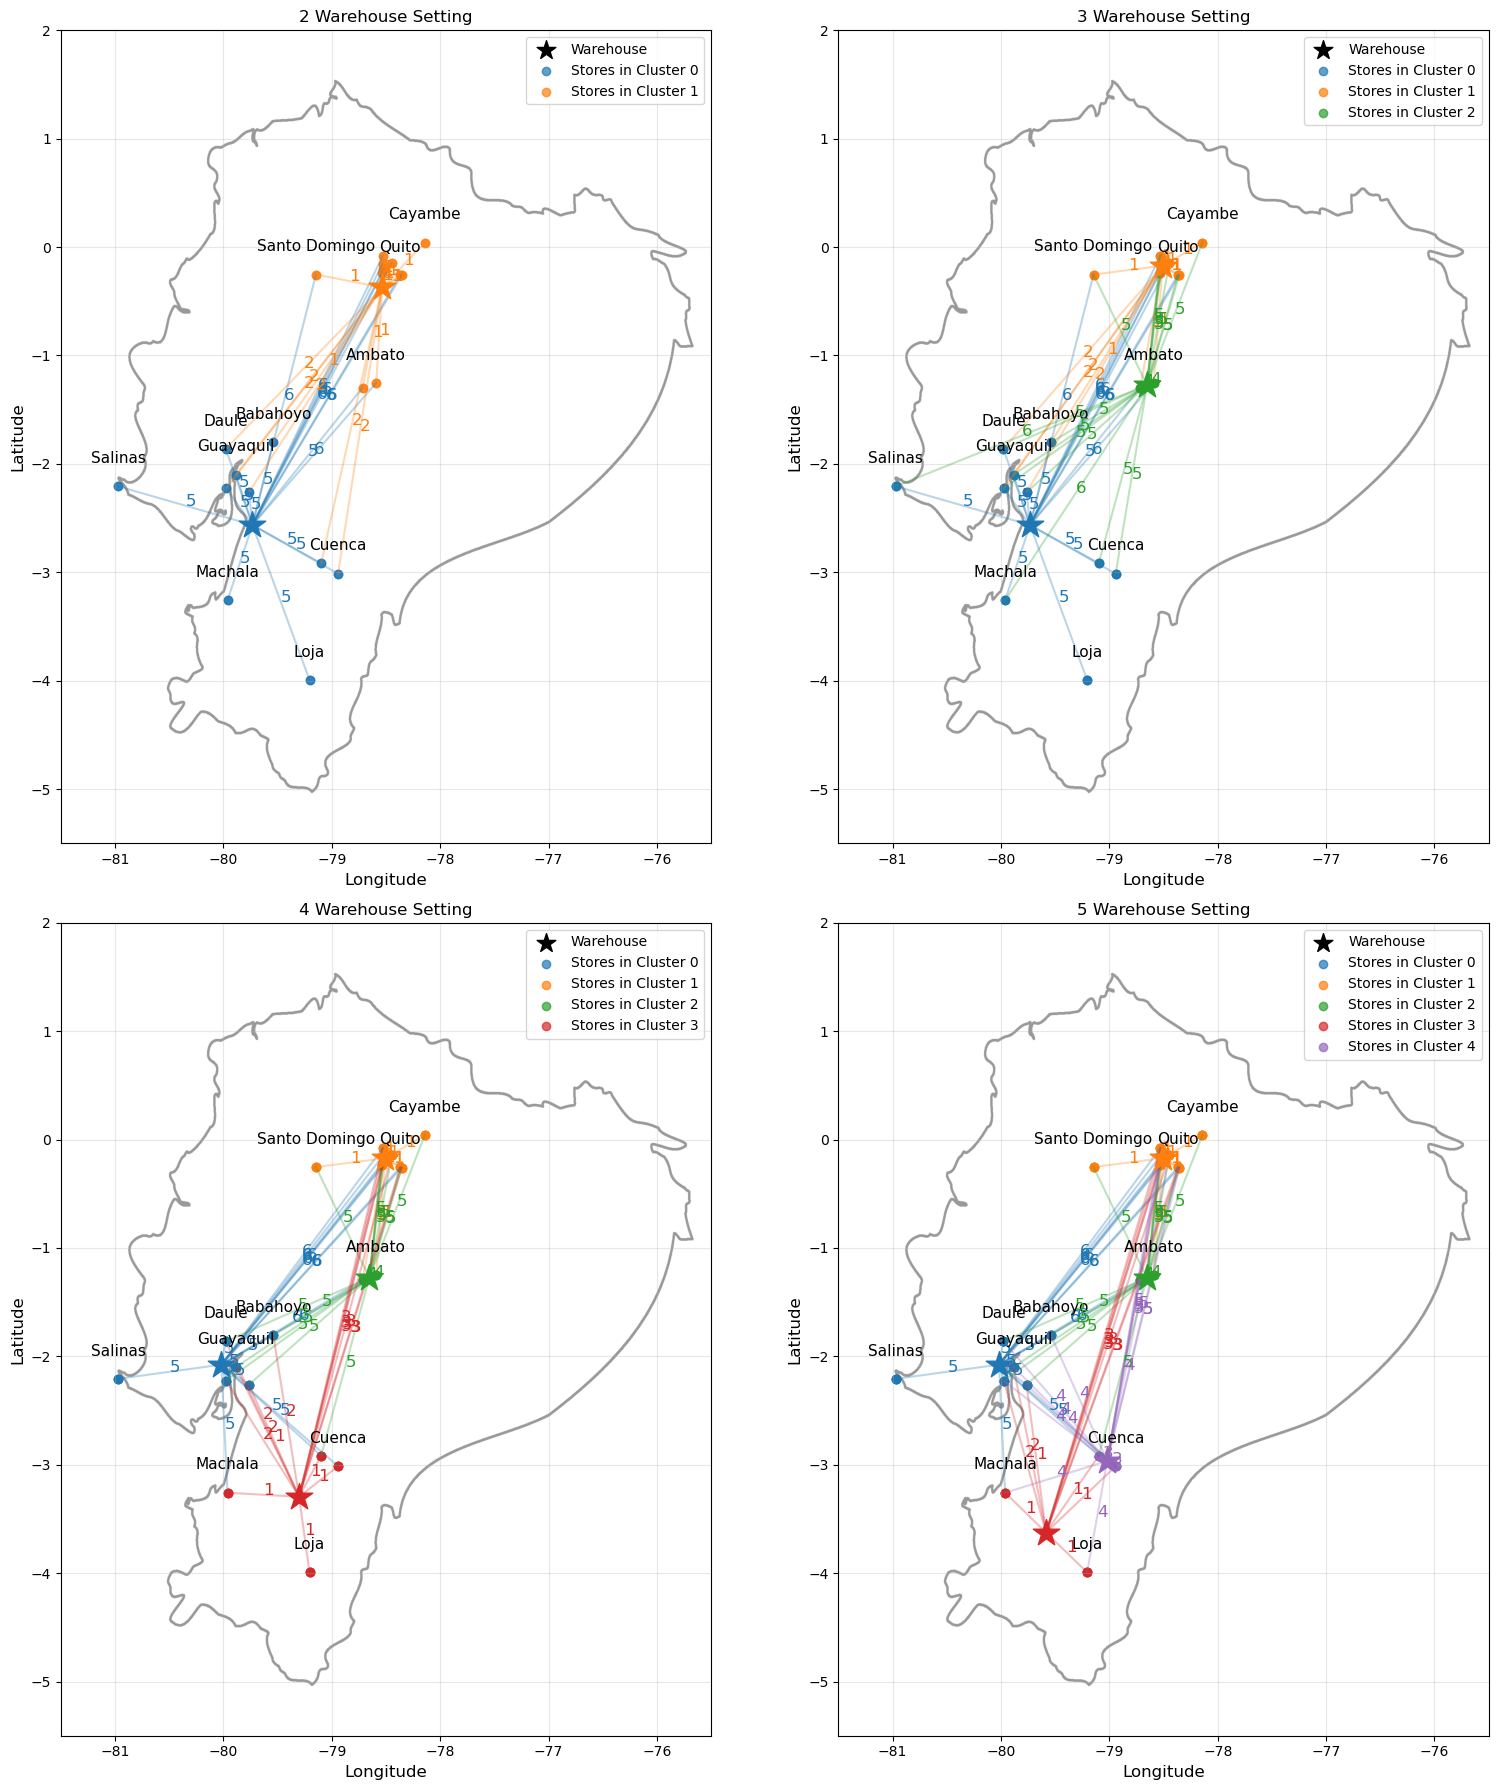

In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.image as mpimg

# -----------------------------
# 1. Define store data and selection
# -----------------------------

# Create a DataFrame for the 54 stores
data = [
    [1, "Quito", "Pichincha", "D", 13],
    [2, "Quito", "Pichincha", "D", 13],
    [3, "Quito", "Pichincha", "D", 8],
    [4, "Quito", "Pichincha", "D", 9],
    [5, "Santo Domingo", "Santo Domingo de los Tsachilas", "D", 4],
    [6, "Quito", "Pichincha", "D", 13],
    [7, "Quito", "Pichincha", "D", 8],
    [8, "Quito", "Pichincha", "D", 8],
    [9, "Quito", "Pichincha", "B", 6],
    [10, "Quito", "Pichincha", "C", 15],
    [11, "Cayambe", "Pichincha", "B", 6],
    [12, "Latacunga", "Cotopaxi", "C", 15],
    [13, "Latacunga", "Cotopaxi", "C", 15],
    [14, "Riobamba", "Chimborazo", "C", 7],
    [15, "Ibarra", "Imbabura", "C", 15],
    [16, "Santo Domingo", "Santo Domingo de los Tsachilas", "C", 3],
    [17, "Quito", "Pichincha", "C", 12],
    [18, "Quito", "Pichincha", "B", 16],
    [19, "Guaranda", "Bolivar", "C", 15],
    [20, "Quito", "Pichincha", "B", 6],
    [21, "Santo Domingo", "Santo Domingo de los Tsachilas", "B", 6],
    [22, "Puyo", "Pastaza", "C", 7],
    [23, "Ambato", "Tungurahua", "D", 9],
    [24, "Guayaquil", "Guayas", "D", 1],
    [25, "Salinas", "Santa Elena", "D", 1],
    [26, "Guayaquil", "Guayas", "D", 10],
    [27, "Daule", "Guayas", "D", 1],
    [28, "Guayaquil", "Guayas", "E", 10],
    [29, "Guayaquil", "Guayas", "E", 10],
    [30, "Guayaquil", "Guayas", "C", 3],
    [31, "Babahoyo", "Los Rios", "B", 10],
    [32, "Guayaquil", "Guayas", "C", 3],
    [33, "Quevedo", "Los Rios", "C", 3],
    [34, "Guayaquil", "Guayas", "B", 6],
    [35, "Playas", "Guayas", "C", 3],
    [36, "Libertad", "Guayas", "E", 10],
    [37, "Cuenca", "Azuay", "D", 2],
    [38, "Loja", "Loja", "D", 4],
    [39, "Cuenca", "Azuay", "B", 6],
    [40, "Machala", "El Oro", "C", 3],
    [41, "Machala", "El Oro", "D", 4],
    [42, "Cuenca", "Azuay", "D", 2],
    [43, "Esmeraldas", "Esmeraldas", "E", 10],
    [44, "Quito", "Pichincha", "A", 5],
    [45, "Quito", "Pichincha", "A", 11],
    [46, "Quito", "Pichincha", "A", 14],
    [47, "Quito", "Pichincha", "A", 14],
    [48, "Quito", "Pichincha", "A", 14],
    [49, "Quito", "Pichincha", "A", 11],
    [50, "Ambato", "Tungurahua", "A", 14],
    [51, "Guayaquil", "Guayas", "A", 17],
    [52, "Manta", "Manabi", "A", 11],
    [53, "Manta", "Manabi", "D", 13],
    [54, "El Carmen", "Manabi", "C", 3]
]
columns = ["store_nbr", "city", "state", "type", "cluster"]
stores_df = pd.DataFrame(data, columns=columns)

max_distance_multipliers = [1.8, 1.8, 1.8, 1.8, 1.8]
max_overall_clusters = True
connect_to_quitos = True

# Filter stores_df to keep only the specified store numbers
stores_to_keep = [3, 5, 8, 11, 23, 25, 27, 28, 31, 34, 37, 38, 39, 41, 44, 45, 47, 48, 49, 50, 51]
stores_df = stores_df[stores_df['store_nbr'].isin(stores_to_keep)].reset_index(drop=True)
print(f"Filtered to {len(stores_df)} stores")

# Group stores by city
city_groups = stores_df.groupby("city")
# Find cities with >1 store (multi-store) and with exactly 1 store (single-store)
multi_store_cities = [city for city, group in city_groups if len(group) > 1]
single_store_cities = [city for city, group in city_groups if len(group) == 1]

# Use all stores since data already has 46 stores
selected_stores = stores_df.reset_index(drop=True)
print("Total selected stores:", len(selected_stores))


# -----------------------------
# 2. Assign random coordinates based on city centers
# -----------------------------
# Original dictionary: keys are city names, values are (lon, lat) tuples
city_coords = {
    "Esmeraldas": (-79.6545, 0.9682),
    "Ibarra": (-78.1165, 0.3517),
    "Cayambe": (-78.1416, 0.0412),
    "Quito": (-78.4678, -0.1807),
    "Santo Domingo": (-79.1459, -0.253),
    "Manta": (-80.7214, -0.9682),
    "Latacunga": (-78.6131, -0.9352),
    "El Carmen": (-79.8413, -0.3944),
    "Quevedo": (-79.4632, -1.0281),
    "Puyo": (-78.0035, -1.4921),
    "Ambato": (-78.6197, -1.2491),
    "Riobamba": (-78.6546, -1.6636),
    "Babahoyo": (-79.5400, -1.8022),
    "Daule": (-79.9775, -1.8619),
    "Guayaquil": (-79.8891, -2.1709),
    "Libertad": (-80.9182, -2.2333),
    "Playas": (-80.3895, -2.6333),
    "Salinas": (-80.9693, -2.2072),
    "Cuenca": (-79.0059, -2.9006),
    "Machala": (-79.9616, -3.2581),
    "Loja": (-79.2050, -3.9931),
    "Guaranda": (-79.0000, -1.5900),
}


def latlon_to_mercator(lon, lat):
    """
    Convert longitude and latitude (in degrees) to x, y coordinates 
    in the Web Mercator projection (in meters).
    """
    R = 6378137  # Earth's radius in meters for Web Mercator
    x = R * math.radians(lon)
    y = R * math.log(math.tan(math.pi/4 + math.radians(lat)/2))
    return x, y

# Convert the dictionary of city centers to Web Mercator (x, y) coordinates
mercator_coords = {city: latlon_to_mercator(lon, lat) for city, (lon, lat) in city_coords.items()}
# Mirror coordinates by y=x axis by swapping x and y coordinates
mercator_coords = {city: (y, x) for city, (x, y) in mercator_coords.items()}

city_coords = mercator_coords


rng = np.random.RandomState(5)  # Fixed seed for reproducibility
# Function to add random noise (simulate dispersion within a city's area)
def random_location(city, noise=15000):  # noise in meters for mercator coords
    if city in city_coords:
        base_x, base_y = city_coords[city]
        # Only add noise if city has multiple stores
        if city in multi_store_cities:
            # add uniform noise in x and y coordinates with fixed seed
            x = base_x + rng.uniform(-noise, noise)
            y = base_y + rng.uniform(-noise, noise)
        else:
            # Use exact city coordinates for single-store cities
            x, y = base_x, base_y
        return x, y
    else:
        # if city not in lookup, return NaN
        return np.nan, np.nan

# Assign random lat, lon for each selected store
lats, lons = [], []
for idx, row in selected_stores.iterrows():
    lat, lon = random_location(row["city"])
    lats.append(lat)
    lons.append(lon)
selected_stores["lat"] = lats
selected_stores["lon"] = lons

# -----------------------------
# 3. Define haversine distance function
# -----------------------------
def haversine(x1, y1, x2, y2):
    # Since coordinates are already in Web Mercator projection (meters)
    # We can use Euclidean distance and convert to kilometers
    dx = x2 - x1
    dy = y2 - y1
    distance_meters = math.sqrt(dx**2 + dy**2)
    return distance_meters / 1000  # Convert to kilometers

# -----------------------------
# 4. Clustering, cost and lead time computations and plotting
# -----------------------------

# Define warehouse primitives (holding cost, lead time range)
WAREHOUSE_PRIMITIVES = [
    (0.3, [5, 6]),  # W0
    (0.4, [1, 2]),  # W1
    (0.2, [4, 6]),  # W2
    (0.5, [1, 3]),  # W3
    (0.1, [3, 5]),  # W4
    (0.6, [2, 4])   # W5
]

# Create a figure with 4 subplots for 2, 3, 4, and 5 warehouses
fig, axes = plt.subplots(2, 2, figsize=(16, 18))
axes = axes.flatten()

# We'll work on the numpy array of store coordinates
coords = selected_stores[["lat", "lon"]].values


def mercator_to_latlon(x, y):
    """
    Convert x, y coordinates in the Web Mercator projection (in meters)
    back to longitude and latitude (in degrees).
    """
    R = 6378137  # Earth's radius in meters for Web Mercator
    lon = math.degrees(x / R)
    lat = math.degrees(2 * math.atan(math.exp(y / R)) - math.pi/2)
    return lon, lat

# For each setting (number of warehouses = k)
for i, k in enumerate([2, 3, 4, 5]):
    ax = axes[i]
    img = mpimg.imread('/user/ml4723/Prj/NIC/Input/favorita-grocery-sales-forecasting/Outline_Simple_Map_of_Ecuador.eps')
    ax.imshow(img, extent=[-82.15, -74.5, -6, 2.5], alpha=0.4)
    max_distance_multiplier = max_distance_multipliers[i]
    # Run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(coords)
    centers = kmeans.cluster_centers_
    
    # Append cluster labels to DataFrame copy
    stores_clustered = selected_stores.copy()
    stores_clustered["cluster"] = labels
    
    # Determine number of stores per cluster
    cluster_counts = stores_clustered.groupby("cluster").size()
    
    # For printing warehouse info
    warehouse_info = []
    
    # Calculate max distances for each cluster
    max_distances = []
    for cluster in range(k):
        cluster_stores = stores_clustered[stores_clustered["cluster"] == cluster]
        center_lat, center_lon = centers[cluster]
        # Calculate distances from center to all points in cluster
        distances = [haversine(center_lat, center_lon, store["lat"], store["lon"]) 
                    for _, store in cluster_stores.iterrows()]
        # Get the maximum distance
        max_dist = max(distances) if distances else 0
        max_distances.append(max_dist)
    
    # Get the overall maximum distance across all clusters
    max_overall_distance = max(max_distances)
    
    # Initialize edges and lead times matrices
    edges = np.zeros((k, len(stores_clustered)))
    lead_times = np.zeros((k, len(stores_clustered)))
    
    # For each warehouse (cluster)
    for cluster in range(k):
        cluster_stores = stores_clustered[stores_clustered["cluster"] == cluster]
        w_n = len(cluster_stores)
        
        # Get the holding cost and lead time range for this warehouse
        holding_cost, lead_time_range = WAREHOUSE_PRIMITIVES[cluster]
        dl0, dl1 = lead_time_range
        
        # Compute distances of each store in cluster from warehouse center
        center_lat, center_lon = centers[cluster]
        distances = []
        for idx, store in stores_clustered.iterrows():
            d = haversine(center_lat, center_lon, store["lat"], store["lon"])
            distances.append(d)
            
            # Check if store is within max overall distance * multiplier
            if d <= max_overall_distance * max_distance_multiplier:
                edges[cluster][idx] = 1
            
            # If connect_to_quitos is True, connect all warehouses to stores in Quito
            if connect_to_quitos and store["city"] == "Quito":
                edges[cluster][idx] = 1
                
        # Determine min and max distance in this cluster (for normalization)
        if distances:
            min_d = min(distances)
            max_d = max(max(distances), max_overall_distance)
        else:
            min_d, max_d = 0, 0
        
        # For each distance, compute lead time based on distance and warehouse-specific range
        for idx, d in enumerate(distances):
            if max_d != min_d:
                norm_d = (d - min_d) / (max_d - min_d)
            else:
                norm_d = 0
                
            lead_time = dl0 + (dl1 - dl0) * norm_d
            lead_times[cluster][idx] = np.round(lead_time)
        
        warehouse_info.append({
            "warehouse": cluster,
            "stores": w_n,
            "holding_cost": holding_cost
        })

    # Plotting: scatter plot for store locations colored by cluster, and mark warehouse centers.
    # First plot warehouse marker in legend
    ax.scatter([], [], c='black', marker='*', s=200, label='Warehouse')
    # Define colors for clusters - using a simpler color palette
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
              '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']
    
    # Plot connections and stores for each cluster
    connected_stores_count = [0] * k  # Initialize counter for each cluster
    
    for cluster in range(k):
        cluster_data = stores_clustered[stores_clustered["cluster"] == cluster]
        color = colors[cluster % len(colors)]  # Get color for this cluster
        center_lat, center_lon = centers[cluster]
        # Convert center coordinates to lat/lon
        center_lon, center_lat = mercator_to_latlon(center_lon, center_lat)
        
        for _, store in stores_clustered.iterrows():
            # Convert store coordinates to lat/lon
            store_lon, store_lat = mercator_to_latlon(store["lon"], store["lat"])
            dist = haversine(center_lat, center_lon, store_lat, store_lon)
            # Plot store
            store_color = colors[store["cluster"] % len(colors)]
            ax.scatter(store_lon, store_lat, 
                      color=store_color, alpha=0.7)
            
            # Draw connection line if edge exists
            if edges[cluster][store.name]:
                ax.plot([center_lon, store_lon], 
                       [center_lat, store_lat], 
                       color=color, alpha=0.3, linestyle='-')
                # Add lead time label at midpoint of edge
                mid_lon = (center_lon + store_lon) / 2
                mid_lat = (center_lat + store_lat) / 2
                lead_time = int(lead_times[cluster][store.name])
                ax.annotate(str(lead_time), 
                           (mid_lon, mid_lat),
                           fontsize=12,
                           color=color,
                           alpha=1.0)
                connected_stores_count[cluster] += 1
                
        # Plot warehouse center
        ax.scatter(center_lon, center_lat, c=color, marker="*", s=400, zorder=10)
        
        # Add cluster label to legend
        ax.scatter([], [], c=color, label=f"Stores in Cluster {cluster}", alpha=0.7)
        
        # Track cities already labeled in this cluster
        labeled_cities = set()
        # Add city names for each point
        for _, store in cluster_data.iterrows():
            store_lon, store_lat = mercator_to_latlon(store["lon"], store["lat"])
            if store["city"] not in labeled_cities:
                ax.annotate(store["city"], (store_lon, store_lat), 
                           fontsize=11, alpha=1.0,
                            ha='center',
                            va='center',
                           xytext=(0, 20), textcoords='offset points')
                labeled_cities.add(store["city"])
            
    ax.set_title(f"{k} Warehouse Setting")
    ax.legend()
    ax.set_xlabel("Longitude", fontsize=12)
    ax.set_ylabel("Latitude", fontsize=12)
    ax.set_xlim([-81.5, -75.5])
    ax.set_ylim([-5.5, 2.0])
    ax.tick_params(labelsize=10)
    ax.grid(True, alpha=0.3)

    print(f"\nSetting with {k} warehouse(s):")
    print("\nEdges matrix:")
    print(edges)
    print("\nLead times matrix:")
    print(lead_times)
    for info, connected_count in zip(warehouse_info, connected_stores_count):
        print(f" Warehouse {info['warehouse']}: #Stores = {info['stores']}, "
                f"Connected stores = {connected_count}, "
                f"Holding cost = {info['holding_cost']}")

plt.tight_layout()
plt.show()



Edges matrix (warehouses x stores):
[
, [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1
, , 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0
, , 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1
, , 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0
, , 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0
, , 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1
, , 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1]
]

Edges matrix with stores in clus

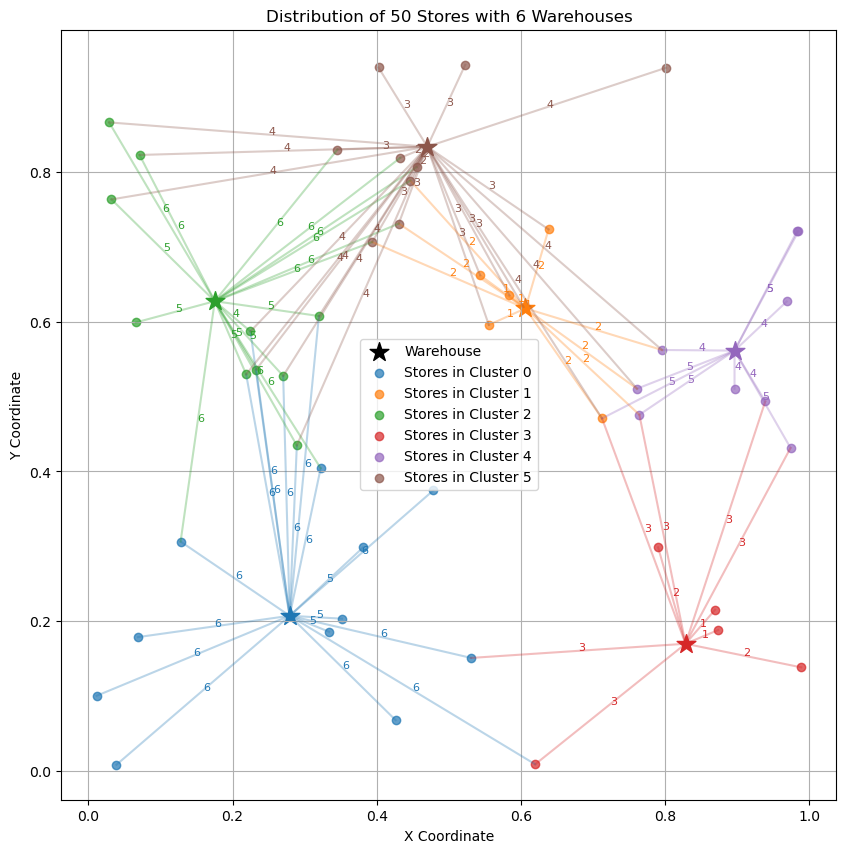

In [78]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# -----------------------------
# Parameters
# -----------------------------
# Define the 5 sets of (warehouses, stores)
WAREHOUSE_STORE_SETS = [
    (2, 10),   # 2 warehouses, 10 stores
    (3, 20),   # 3 warehouses, 20 stores
    (4, 30),   # 4 warehouses, 30 stores
    (5, 40),   # 5 warehouses, 40 stores
    (6, 50)    # 6 warehouses, 50 stores
]

# Define warehouse primitives (holding cost, lead time range)
WAREHOUSE_PRIMITIVES = [
    (0.3, [5, 6]),  # W0
    (0.4, [1, 2]),  # W1
    (0.2, [4, 6]),  # W2
    (0.5, [1, 3]),  # W3
    (0.1, [3, 5]),  # W4
    (0.6, [2, 4])   # W5
]

# Select which set to use (0-4)
# SET_INDEX = 0
# seed = 45

# SET_INDEX = 1
# seed = 2

SET_INDEX = 2
seed = 0

# SET_INDEX = 3
# seed = 8

# SET_INDEX = 4
# seed = 8



connection_distance_multiplier = 1.3
np.random.seed(seed)
N_WAREHOUSES, N_STORES = WAREHOUSE_STORE_SETS[SET_INDEX]
# -----------------------------
# 1. Generate random store locations
# -----------------------------
# Generate random coordinates between 0 and 1
x_coords = np.random.uniform(0, 1, N_STORES)
y_coords = np.random.uniform(0, 1, N_STORES)

# Create DataFrame with store locations
stores_df = pd.DataFrame({
    'store_nbr': range(N_STORES),
    'x': x_coords,
    'y': y_coords
})

# -----------------------------
# 2. Define distance function
# -----------------------------
def euclidean_distance(x1, y1, x2, y2):
    """Calculate Euclidean distance between two points"""
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# -----------------------------
# 3. Clustering and plotting
# -----------------------------

# Create figure
plt.figure(figsize=(10, 10))

# Get store coordinates for clustering
coords = stores_df[['x', 'y']].values

# Run k-means clustering
kmeans = KMeans(n_clusters=N_WAREHOUSES, random_state=42)
labels = kmeans.fit_predict(coords)
centers = kmeans.cluster_centers_

# Add cluster labels to DataFrame
stores_df['cluster'] = labels

# Determine number of stores per cluster
cluster_counts = stores_df.groupby('cluster').size()
min_count = cluster_counts.min()
max_count = cluster_counts.max()

# For printing warehouse info
warehouse_info = []

# Calculate max distances for each cluster
max_distances = []
for cluster in range(N_WAREHOUSES):
    cluster_stores = stores_df[stores_df['cluster'] == cluster]
    center_x, center_y = centers[cluster]
    distances = [euclidean_distance(center_x, center_y, store['x'], store['y']) 
                for _, store in cluster_stores.iterrows()]
    max_dist = max(distances) if distances else 0
    max_distances.append(max_dist)

# For each warehouse (cluster)
connected_stores_count = [0] * N_WAREHOUSES
edges = np.zeros((N_WAREHOUSES, N_STORES))  # Matrix to store edges
lead_times = np.zeros((N_WAREHOUSES, N_STORES))  # Matrix to store lead times

for cluster in range(N_WAREHOUSES):
    cluster_stores = stores_df[stores_df['cluster'] == cluster]
    w_n = len(cluster_stores)
    
    # Get warehouse primitives
    holding_cost = WAREHOUSE_PRIMITIVES[cluster][0]
    lead_time_range = WAREHOUSE_PRIMITIVES[cluster][1]
    dl0, dl1 = lead_time_range
    
    # Get cluster center coordinates
    center_x, center_y = centers[cluster]
    
    # Find max distance in cluster for normalizing distances
    max_dist = max_distances[cluster]
    
    warehouse_info.append({
        "warehouse": cluster,
        "stores": w_n,
        "holding_cost": holding_cost,
    })

    # Calculate edges and lead times
    for store_idx, store in stores_df.iterrows():
        dist = euclidean_distance(center_x, center_y, store['x'], store['y'])
        
        # Check if store should be connected
        if dist <= max_dist * connection_distance_multiplier:
            edges[cluster][store_idx] = 1
            connected_stores_count[cluster] += 1
            
            # Calculate lead time
            # Base lead time component
            dist_lt = dl0 + (dl1 - dl0) * min(1.0, dist/max_dist)
            # Total lead time (rounded up to integer)
            lead_times[cluster][store_idx] = np.round(dist_lt)

# Print edges matrix
print("\nEdges matrix (warehouses x stores):")
print(str(edges.astype(int)).replace(' [', '[').replace('[[', '[\n [').replace(']]', ']\n]').replace(' ', ', '))

# Print edges matrix with stores in cluster only
print("\nEdges matrix with stores in cluster only (warehouses x stores):")
cluster_edges = np.zeros((N_WAREHOUSES, N_STORES))
for cluster in range(N_WAREHOUSES):
    cluster_stores = stores_df[stores_df['cluster'] == cluster].index
    cluster_edges[cluster][cluster_stores] = edges[cluster][cluster_stores]

print(str(cluster_edges.astype(int)).replace(' [', '[').replace('[[', '[\n [').replace(']]', ']\n]').replace(' ', ', '))

# Print lead times matrix
print("\nLead times matrix (warehouses x stores):")
print(str(lead_times.astype(int)).replace(' [', '[').replace('[[', '[\n [').replace(']]', ']\n]').replace(' ', ', '))

# Plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# First plot warehouse marker in legend
plt.scatter([], [], c='black', marker='*', s=200, label='Warehouse')

# Plot stores and connections
for cluster in range(N_WAREHOUSES):
    color = colors[cluster % len(colors)]
    cluster_data = stores_df[stores_df['cluster'] == cluster]
    center_x, center_y = centers[cluster]
    
    # Plot stores
    plt.scatter(cluster_data['x'], cluster_data['y'], 
                color=color, alpha=0.7, label=f'Stores in Cluster {cluster}')
    
    # Plot warehouse
    plt.scatter(center_x, center_y, c=color, marker='*', s=200)
    
    # Plot connections and lead times
    for store_idx, store in stores_df.iterrows():
        if edges[cluster][store_idx] == 1:
            plt.plot([center_x, store['x']], [center_y, store['y']], 
                     color=color, alpha=0.3, linestyle='-')
            # Add lead time text at midpoint of connection line
            mid_x = (center_x + store['x']) / 2
            mid_y = (center_y + store['y']) / 2
            plt.text(mid_x, mid_y, f"{int(lead_times[cluster][store_idx])}", 
                    color=color, fontsize=8)

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title(f"Distribution of {N_STORES} Stores with {N_WAREHOUSES} Warehouses")
plt.legend()
plt.grid(True)

print(f"\nWarehouse Statistics:")
for info, connected_count in zip(warehouse_info, connected_stores_count):
    print(f" Warehouse {info['warehouse']}: #Stores = {info['stores']}, "
          f"Connected stores = {connected_count}, "
          f"holding cost = {info['holding_cost']:.2f}")

plt.show()


/user/ml4723/.conda/envs/neural_inventory_control/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/user/ml4723/.conda/envs/neural_inventory_control/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (



Edges matrix (warehouses x stores):
[
, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
]

Lead times matrix (warehouses x stores):
[
, [4, 3, 4, 4, 2, 4, 4, 3, 3, 4, 4, 3, 3, 3, 4, 0, 0, 4, 4, 3]
[5, 0, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 4, 0]
]

Warehouse Statistics:
 Warehouse 0: #Stores = 8, Connected stores = 18, min lead time = 1.00, holding cost = 0.40
 Warehouse 1: #Stores = 12, Connected stores = 18, min lead time = 3.00, holding cost = 0.20


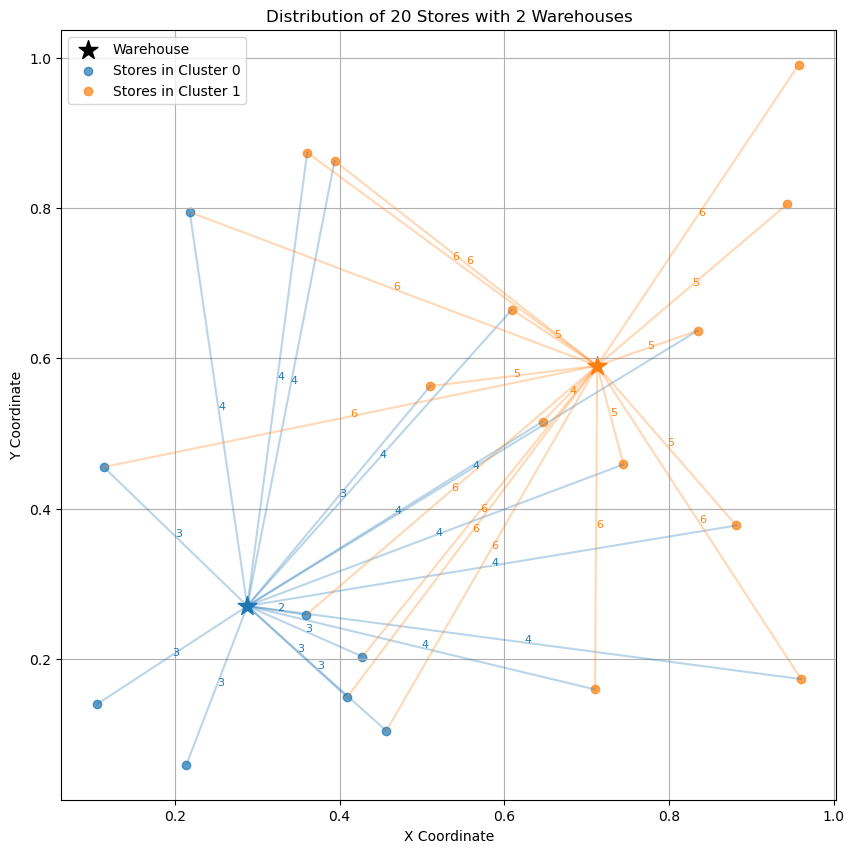

In [ ]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# -----------------------------
# Parameters
# -----------------------------
N_STORES = 20  # Number of stores to sample
N_WAREHOUSES = 2  # Number of warehouses
np.random.seed(44)
connection_distance_multiplier = 1.3


# N_STORES = 40  # Number of stores to sample
# N_WAREHOUSES = 3  # Number of warehouses
# np.random.seed(45)
# connection_distance_multiplier = 1.3

# N_STORES = 50  # Number of stores to sample
# N_WAREHOUSES = 4  # Number of warehouses
# np.random.seed(77)
# connection_distance_multiplier = 1.7

# -----------------------------
# 1. Generate random store locations
# -----------------------------
# Generate random coordinates between 0 and 1
x_coords = np.random.uniform(0, 1, N_STORES)
y_coords = np.random.uniform(0, 1, N_STORES)

# Create DataFrame with store locations
stores_df = pd.DataFrame({
    'store_nbr': range(N_STORES),
    'x': x_coords,
    'y': y_coords
})

# -----------------------------
# 2. Define distance function
# -----------------------------
def euclidean_distance(x1, y1, x2, y2):
    """Calculate Euclidean distance between two points"""
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# -----------------------------
# 3. Clustering and plotting
# -----------------------------

# Primitive parameters
h0, h1 = 0.2, 0.4  # warehouse holding cost range
dl0, dl1 = 1, 3    # distance lead time range

# Create figure
plt.figure(figsize=(10, 10))

# Get store coordinates for clustering
coords = stores_df[['x', 'y']].values

# Run k-means clustering
kmeans = KMeans(n_clusters=N_WAREHOUSES, random_state=42)
labels = kmeans.fit_predict(coords)
centers = kmeans.cluster_centers_

# Add cluster labels to DataFrame
stores_df['cluster'] = labels

# Determine number of stores per cluster
cluster_counts = stores_df.groupby('cluster').size()
min_count = cluster_counts.min()
max_count = cluster_counts.max()

# For printing warehouse info
warehouse_info = []

# Calculate max distances for each cluster
max_distances = []
for cluster in range(N_WAREHOUSES):
    cluster_stores = stores_df[stores_df['cluster'] == cluster]
    center_x, center_y = centers[cluster]
    distances = [euclidean_distance(center_x, center_y, store['x'], store['y']) 
                for _, store in cluster_stores.iterrows()]
    max_dist = max(distances) if distances else 0
    max_distances.append(max_dist)

# For each warehouse (cluster)
connected_stores_count = [0] * N_WAREHOUSES
edges = np.zeros((N_WAREHOUSES, N_STORES))  # Matrix to store edges
lead_times = np.zeros((N_WAREHOUSES, N_STORES))  # Matrix to store lead times

for cluster in range(N_WAREHOUSES):
    cluster_stores = stores_df[stores_df['cluster'] == cluster]
    w_n = len(cluster_stores)
    
    # Compute normalized weight
    w_k = (w_n - min_count) / (max_count - min_count) if max_count != min_count else 1.0
    
    # Compute warehouse holding cost
    w_h = h0 + (h1 - h0) * (1 - w_k) if max_count != min_count else (h0 + h1) / 2
    
    # Get cluster center coordinates
    center_x, center_y = centers[cluster]
    
    # Find max distance in cluster for normalizing distances
    max_dist = max_distances[cluster]
    
    # Minimal lead time calculation
    ml_part = ml0 + (ml1 - ml0) * w_k if max_count != min_count else (ml0 + ml1) / 2
    
    warehouse_info.append({
        "warehouse": cluster,
        "stores": w_n,
        "holding_cost": w_h,
        "min_lead_time": ml_part
    })

    # Calculate edges and lead times
    for store_idx, store in stores_df.iterrows():
        dist = euclidean_distance(center_x, center_y, store['x'], store['y'])
        
        # Check if store should be connected
        if dist <= max_dist * connection_distance_multiplier:
            edges[cluster][store_idx] = 1
            connected_stores_count[cluster] += 1
            
            # Calculate lead time
            # Base lead time component
            base_lt = ml0 + (ml1 - ml0) * w_k
            # Distance-based lead time component
            dist_lt = dl0 + (dl1 - dl0) * min(1.0, dist/max_dist)
            # Total lead time (rounded up to integer)
            lead_times[cluster][store_idx] = np.round(base_lt + dist_lt)

# Print edges matrix
print("\nEdges matrix (warehouses x stores):")
print(str(edges.astype(int)).replace(' [', '[').replace('[[', '[\n [').replace(']]', ']\n]').replace(' ', ', '))

# Print lead times matrix
print("\nLead times matrix (warehouses x stores):")
print(str(lead_times.astype(int)).replace(' [', '[').replace('[[', '[\n [').replace(']]', ']\n]').replace(' ', ', '))

# Plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# First plot warehouse marker in legend
plt.scatter([], [], c='black', marker='*', s=200, label='Warehouse')

# Plot stores and connections
for cluster in range(N_WAREHOUSES):
    color = colors[cluster % len(colors)]
    cluster_data = stores_df[stores_df['cluster'] == cluster]
    center_x, center_y = centers[cluster]
    
    # Plot stores
    plt.scatter(cluster_data['x'], cluster_data['y'], 
                color=color, alpha=0.7, label=f'Stores in Cluster {cluster}')
    
    # Plot warehouse
    plt.scatter(center_x, center_y, c=color, marker='*', s=200)
    
    # Plot connections and lead times
    for store_idx, store in stores_df.iterrows():
        if edges[cluster][store_idx] == 1:
            plt.plot([center_x, store['x']], [center_y, store['y']], 
                     color=color, alpha=0.3, linestyle='-')
            # Add lead time text at midpoint of connection line
            mid_x = (center_x + store['x']) / 2
            mid_y = (center_y + store['y']) / 2
            plt.text(mid_x, mid_y, f"{int(lead_times[cluster][store_idx])}", 
                    color=color, fontsize=8)

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title(f"Distribution of {N_STORES} Stores with {N_WAREHOUSES} Warehouses")
plt.legend()
plt.grid(True)

print(f"\nWarehouse Statistics:")
for info, connected_count in zip(warehouse_info, connected_stores_count):
    print(f" Warehouse {info['warehouse']}: #Stores = {info['stores']}, "
          f"Connected stores = {connected_count}, "
          f"min lead time = {info['min_lead_time']:.2f}, "
          f"holding cost = {info['holding_cost']:.2f}")

plt.show()


In [18]:
import os
def create_n_warehouse_config_file(old_config, new_config, option=None):
    new_config_path = f'/user/ml4723/Prj/NIC/config_files/settings/{new_config}.yml'
    # if not os.path.exists(new_config_path):
    with open(f'/user/ml4723/Prj/NIC/config_files/settings/{old_config}.yml', 'r') as src:
        with open(new_config_path, 'w') as dst:
            dst.write(src.read())

    # Load the yml file and extract edge data
    import yaml
    with open(new_config_path, 'r') as f:
        config = yaml.safe_load(f)
        edge_lead_times = config['warehouse_params']['edge_lead_times']['value']
        edges = config['warehouse_params']['edges']['value']
    
    # For each store, find the warehouse with smallest lead time and keep only that connection
    n_warehouses = len(edges)
    n_stores = len(edges[0])
    
    # Create new edge and lead time arrays
    new_edges = [[0 for _ in range(n_stores)] for _ in range(n_warehouses)]
    new_lead_times = [[0 for _ in range(n_stores)] for _ in range(n_warehouses)]
    
    if option == "fastest":
        # For each store
        for store in range(n_stores):
            min_lead_time = float('inf')
            best_warehouse = None
            
            # Find warehouse with smallest lead time that has a connection
            for warehouse in range(n_warehouses):
                if edges[warehouse][store] == 1:
                    if edge_lead_times[warehouse][store] < min_lead_time:
                        min_lead_time = edge_lead_times[warehouse][store]
                        best_warehouse = warehouse
            
            # Keep only connection to best warehouse
            if best_warehouse is not None:
                new_edges[best_warehouse][store] = 1
                new_lead_times[best_warehouse][store] = edge_lead_times[best_warehouse][store]
    
    # Update config with new values
    config['warehouse_params']['edge_lead_times']['value'] = new_lead_times
    config['warehouse_params']['edges']['value'] = new_edges
    
    # Save updated config with proper formatting
    with open(new_config_path, 'w') as f:
        yaml.dump(config, f, default_flow_style=True, width=float('inf'))
        
    return new_lead_times, new_edges

edge_lead_times, edges = create_n_warehouse_config_file('n_warehouse_46_1_real_lost_demand', 'n_warehouse_46_1_real_lost_demand_fastest', "fastest")